In [202]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newbodrumdaten/mycsvfile9.csv
/kaggle/input/newbodrumdaten/mycsvfile10.csv


In [203]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium import Choropleth
from folium.plugins import HeatMap
import datetime
from scipy.stats import norm,skew
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [204]:
data2=pd.read_csv("/kaggle/input/newbodrumdaten/mycsvfile9.csv")

In [205]:
data2 = data2.drop(['Region', 'Unnamed: 0'], axis=1)

In [206]:
data2 = data2.rename(columns={'new2': 'FloatedData'})

In [207]:
data = pd.read_csv("/kaggle/input/newbodrumdaten/mycsvfile9.csv")
data.head()

,Unnamed: 0,Date,Time,Latitude,Longitude,Depth(km),Magnitude,Distance(km),Region,new2
0,0,7/20/2017,03:28:22.81,37.5327,27.4825,5.4,1.8,63.98,KOPRUALAN-SOKE (AYDIN) [South West 4.8 km],2017.547945
1,1,7/20/2017,05:59:54.25,37.1747,27.8777,0.0,1.8,48.71,IKIZKOY-MILAS (MUGLA) [East 1.8 km],2017.547945
2,2,7/20/2017,09:22:22.70,37.1875,27.8663,0.0,1.6,48.55,IKIZKOY-MILAS (MUGLA) [North East 1.7 km],2017.547945
3,3,7/20/2017,09:26:54.88,37.3997,27.8905,0.0,1.5,65.41,OLUKBASI-MILAS (MUGLA) [East 1.7 km],2017.547945
4,4,7/20/2017,09:34:20.94,37.1992,27.8777,0.0,1.7,50.09,KAYADERE-MILAS (MUGLA) [South West 2.2 km],2017.547945


In [208]:
data.isnull().any()

Unnamed: 0      False
Date            False
Time            False
Latitude        False
Longitude       False
Depth(km)       False
Magnitude       False
Distance(km)    False
Region          False
new2            False
dtype: bool

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24780 entries, 0 to 24779
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    24780 non-null  int64  
 1   Date          24780 non-null  object 
 2   Time          24780 non-null  object 
 3   Latitude      24780 non-null  float64
 4   Longitude     24780 non-null  float64
 5   Depth(km)     24780 non-null  float64
 6   Magnitude     24780 non-null  float64
 7   Distance(km)  24780 non-null  float64
 8   Region        24780 non-null  object 
 9   new2          24780 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.9+ MB


Text(0.5, 1.0, 'Correlation between different fearures')

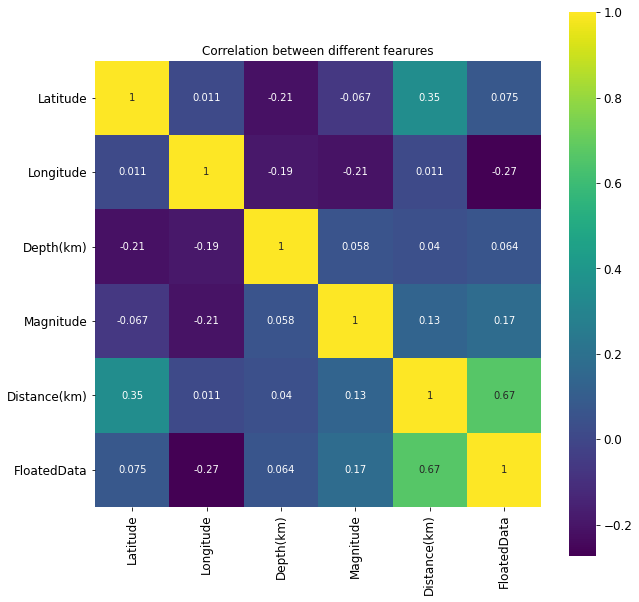

In [210]:
correlation = data2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [211]:
cor=data2.corr()
cor

,Latitude,Longitude,Depth(km),Magnitude,Distance(km),FloatedData
Latitude,1.000000,0.011310,-0.213829,-0.067273,0.346890,0.075124
Longitude,0.011310,1.000000,-0.190704,-0.209903,0.011053,-0.272251
Depth(km),-0.213829,-0.190704,1.000000,0.058457,0.040480,0.063743
Magnitude,-0.067273,-0.209903,0.058457,1.000000,0.134556,0.172712
Distance(km),0.346890,0.011053,0.040480,0.134556,1.000000,0.666535
FloatedData,0.075124,-0.272251,0.063743,0.172712,0.666535,1.000000


**DBSCAN depth-magnitude**

In [212]:
x=data.iloc[:,[5,6]].values

In [213]:
x.shape

(24780, 2)

In [214]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [215]:
model=db.fit(x)

In [216]:
label=model.labels_

In [217]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 3


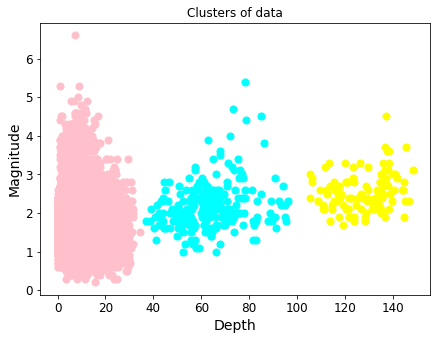

In [218]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Clusters of data')
plt.show()

**3d Clustering**

In [219]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [220]:
# input matrix for segmentation
x = data[['Depth(km)','Magnitude','Latitude', 'Longitude']].values

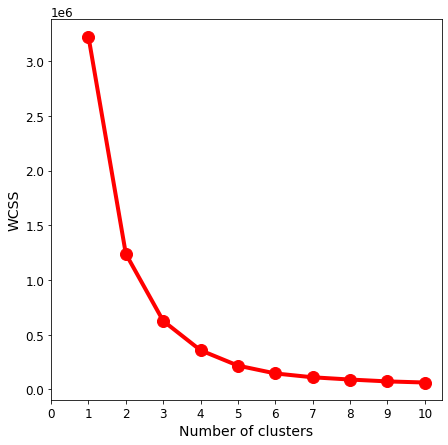

In [221]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [222]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

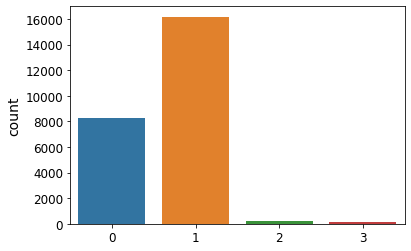

In [223]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [224]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])
print(x[y_clusters == 0,3][1])

29.3
3.4
36.8568
27.587


In [225]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Latitude'),yaxis = dict(title  = 'Longitude'),zaxis = dict(title  = 'Depth'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 2], y=x[:, 3], z=x[:, 1], mode='markers',marker=dict(color = labels, size= 1))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [226]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Depth'),yaxis = dict(title  = 'Latitude'),zaxis = dict(title  = 'Longitude'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 2], z=x[:, 3], mode='markers',marker=dict(color = labels, size= 1))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

**3D Clustering - 2**

In [227]:
data2.head()

,Date,Time,Latitude,Longitude,Depth(km),Magnitude,Distance(km),FloatedData
0,7/20/2017,03:28:22.81,37.5327,27.4825,5.4,1.8,63.98,2017.547945
1,7/20/2017,05:59:54.25,37.1747,27.8777,0.0,1.8,48.71,2017.547945
2,7/20/2017,09:22:22.70,37.1875,27.8663,0.0,1.6,48.55,2017.547945
3,7/20/2017,09:26:54.88,37.3997,27.8905,0.0,1.5,65.41,2017.547945
4,7/20/2017,09:34:20.94,37.1992,27.8777,0.0,1.7,50.09,2017.547945


In [228]:
import numpy as np
from sklearn import preprocessing

DF_ARRAY = np.array(data2.iloc[:,3:7])          # Getting only the numeric features from the dataset
DF_NORM  = preprocessing.normalize(DF_ARRAY) # Normalizing the data

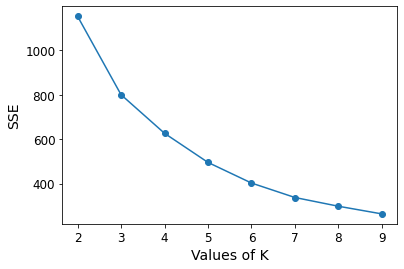

In [229]:
import matplotlib.pyplot as plt

# Amount of values to be tested for K
Ks = range(2, 10)

# List to hold on the metrics for each value of K
results = []

# Executing the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(DF_NORM)
    
    results.append(model.inertia_)

# Plotting the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()

In [230]:
from sklearn.cluster import KMeans

# Creating our Model
kmeans = KMeans(n_clusters = 4)

# Training our model
kmeans.fit(DF_NORM)

# You can see the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# Assigning the labels to the initial dataset
data2['cluster'] = kmeans.labels_

In [231]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data2.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data2[data2.cluster == C]['Latitude'],
                                y = data2[data2.cluster == C]['Longitude'],
                                z = data2[data2.cluster == C]['Depth(km)'],
                                mode = 'markers', marker_size = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Latitude', titlefont_color = 'black'),
                                yaxis=dict(title = 'Longitude', titlefont_color = 'black'),
                                zaxis=dict(title = 'Depth(km)', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [232]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(data2.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = data2[data2.cluster == C]['Latitude'],
                                y = data2[data2.cluster == C]['Longitude'],
                                z = data2[data2.cluster == C]['Magnitude'],
                                mode = 'markers', marker_size = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Latitude', titlefont_color = 'black'),
                                yaxis=dict(title = 'Longitude', titlefont_color = 'black'),
                                zaxis=dict(title = 'Magnitude', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [234]:
data2.head()

,Date,Time,Latitude,Longitude,Depth(km),Magnitude,Distance(km),FloatedData,cluster
0,7/20/2017,03:28:22.81,37.5327,27.4825,5.4,1.8,63.98,2017.547945,1
1,7/20/2017,05:59:54.25,37.1747,27.8777,0.0,1.8,48.71,2017.547945,1
2,7/20/2017,09:22:22.70,37.1875,27.8663,0.0,1.6,48.55,2017.547945,1
3,7/20/2017,09:26:54.88,37.3997,27.8905,0.0,1.5,65.41,2017.547945,1
4,7/20/2017,09:34:20.94,37.1992,27.8777,0.0,1.7,50.09,2017.547945,1


Standardising data
